In [1]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /home/pedrox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedrox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/pedrox/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
!pip install pandas
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
#df['ncm'] = df['ncm'].astype(str).str[:4]
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

/home/pedrox/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='ncm'>

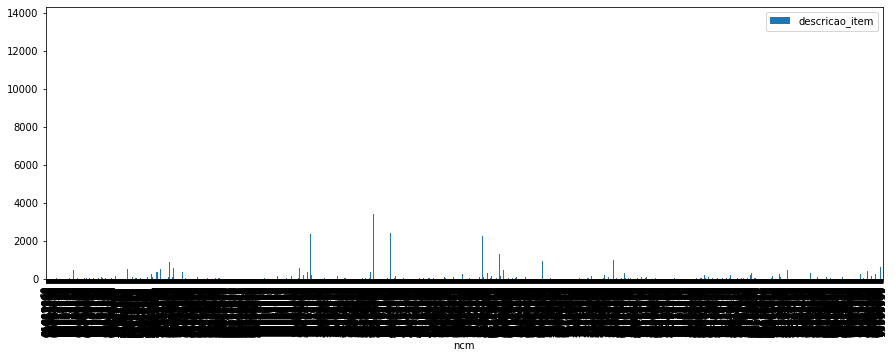

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [4]:
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [5]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 4
entre 5000 e 1000 49
abaixo de 1000 4332


In [6]:
len(df)

343240

In [7]:
#DROP menores que 1000
for i in less1000:
   df.drop(df.loc[df['ncm'] == i].index, inplace=True)

In [8]:
len(df)

142897

In [9]:
import pandas as pd
import numpy as np


for i in over5000: 
    remove_n = len(df.loc[df['ncm'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['ncm'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [10]:
df = df.reset_index()
df

,index,descricao_item,ncm
0,6,GINKGO VITAL MG CPS SIM GINKGO BILOBA,30049099
1,16,OIL E7 15W GRANEL DEP,27101932
2,35,COXIM TRASEIRO REFORCADO B,87089990
3,39,GINKGO VITAL MG CPS SIM GINKGO BILOBA,30049099
4,55,"PRATI SAL LARANJA 50 SACH ,G SIM CITRATO DE ...",30049099
...,...,...,...
125820,343202,X TPA LAT TITAN 150 04 PTO,87141000
125821,343206,XADREZ,30049099
125822,343207,XADREZ,30049099
125823,343215,XICARA CAFE C P MELAMINE BCA C,39241000


In [11]:
df = df.drop(columns=['index'])

<AxesSubplot:xlabel='ncm'>

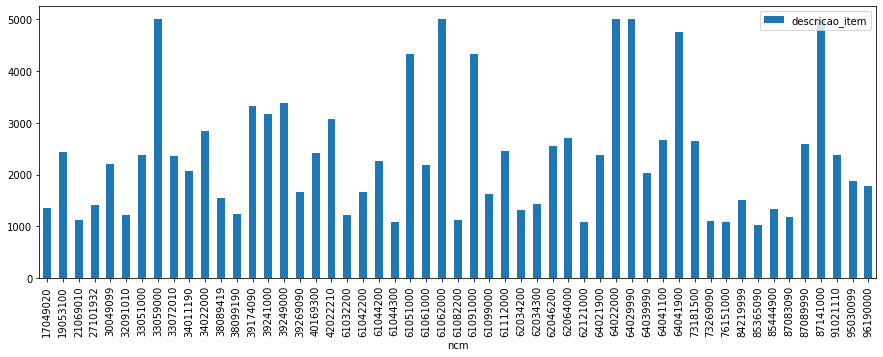

In [12]:
df_group_nw = df.groupby('ncm').count()
df_group_nw
df_group_nw.plot.bar( figsize=(15, 5))

In [13]:
palavras_final = []
for i in range(len(df['descricao_item'])): 
    produto = df['descricao_item'].iloc[i]
    from string import punctuation
    sentencas = nltk.sent_tokenize(produto)
    palavras = nltk.word_tokenize(produto.upper())
    stemmer = nltk.stem.RSLPStemmer()
    palavras_stem = []
    for palavra in palavras:
        palavras_stem.append(stemmer.stem(palavra))
    palavras_sem_stopwords = [palavras_stem for palavras_stem in palavras_stem if palavras_stem not in stopwords]
    palavra_final = ' '.join(palavras_sem_stopwords)
    palavras_final.append(palavra_final)
x = pd.Series(palavras_final)
df['descricao_item_clean'] = x

In [14]:
df.dropna()

,descricao_item,ncm,descricao_item_clean
0,GINKGO VITAL MG CPS SIM GINKGO BILOBA,30049099,ginkg vital mg cp sim ginkg bilob
1,OIL E7 15W GRANEL DEP,27101932,oil e7 15w granel dep
2,COXIM TRASEIRO REFORCADO B,87089990,coxim tras reforc b
3,GINKGO VITAL MG CPS SIM GINKGO BILOBA,30049099,ginkg vital mg cp sim ginkg bilob
4,"PRATI SAL LARANJA 50 SACH ,G SIM CITRATO DE ...",30049099,"prat sal laranj 50 sach , g sim citrat sódi"
...,...,...,...
125820,X TPA LAT TITAN 150 04 PTO,87141000,x tpa lat titan 150 04 pto
125821,XADREZ,30049099,xadr
125822,XADREZ,30049099,xadr
125823,XICARA CAFE C P MELAMINE BCA C,39241000,xic caf c p melamin bca c


In [15]:
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item_clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels_enc = LabelEncoder()
y_train_labels_fit = labels_enc.fit(y_train)
y_train_lables_trf = labels_enc.transform(y_train)

#print(labels.classes_)

In [16]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train)

In [17]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf.predict(p_tfidf)
y_pred = list(map(int, y_pred))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    17049020       0.90      0.97      0.93       263
    19053100       0.97      0.99      0.98       472
    21069010       0.95      0.96      0.95       203
    27101932       0.90      0.92      0.91       253
    30049099       0.82      0.75      0.78       451
    32091010       0.82      0.66      0.73       235
    33051000       0.75      0.52      0.62       456
    33059000       0.80      0.72      0.75      1014
    33072010       0.80      0.66      0.72       492
    34011190       0.93      0.99      0.96       423
    34022000       0.82      0.79      0.81       575
    38089419       0.84      0.79      0.81       325
    38099190       0.90      0.85      0.87       237
    39174090       0.91      0.96      0.94       662
    39241000       0.77      0.81      0.79       578
    39249000       0.80      0.74      0.77       684
    39269090       0.76      0.71      0.73       322
    40169300       0.85    

In [18]:
y_pred



[19053100,
 61051000,
 64041900,
 62121000,
 87141000,
 64022000,
 61091000,
 91021110,
 27101932,
 61062000,
 39241000,
 87089990,
 84219999,
 61051000,
 64021900,
 30049099,
 34011190,
 40169300,
 39249000,
 61091000,
 61044200,
 64022000,
 40169300,
 17049020,
 64021900,
 73181500,
 42022210,
 61062000,
 39269090,
 61099000,
 61061000,
 61091000,
 87089990,
 34011190,
 61042200,
 64039990,
 61044200,
 39249000,
 76151000,
 61032200,
 34011190,
 62121000,
 61091000,
 64022000,
 42022210,
 39249000,
 33072010,
 85365090,
 64029990,
 39174090,
 19053100,
 61044300,
 64039990,
 61091000,
 61091000,
 61042200,
 87141000,
 39269090,
 61091000,
 62121000,
 33072010,
 30049099,
 61091000,
 39174090,
 61044200,
 61062000,
 64022000,
 39249000,
 21069010,
 64022000,
 85444900,
 39249000,
 95030099,
 61044200,
 39249000,
 33059000,
 96190000,
 61042200,
 87141000,
 61062000,
 39249000,
 62121000,
 39249000,
 33072010,
 61042200,
 61061000,
 61032200,
 61091000,
 33059000,
 62046200,
 61099000,